In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

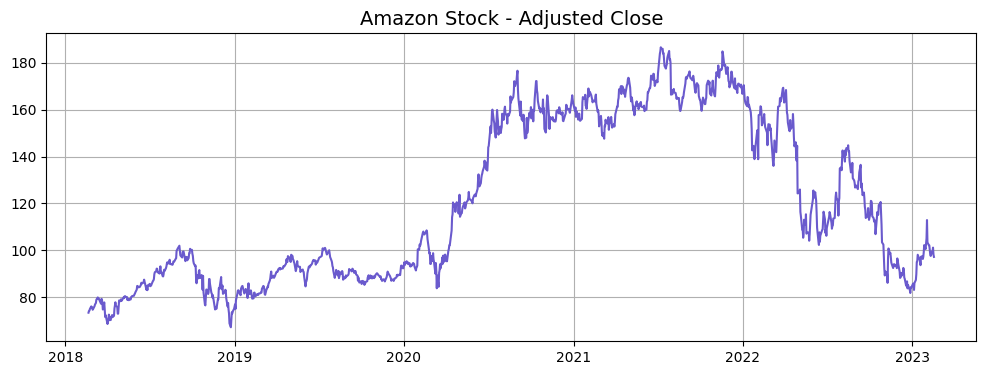

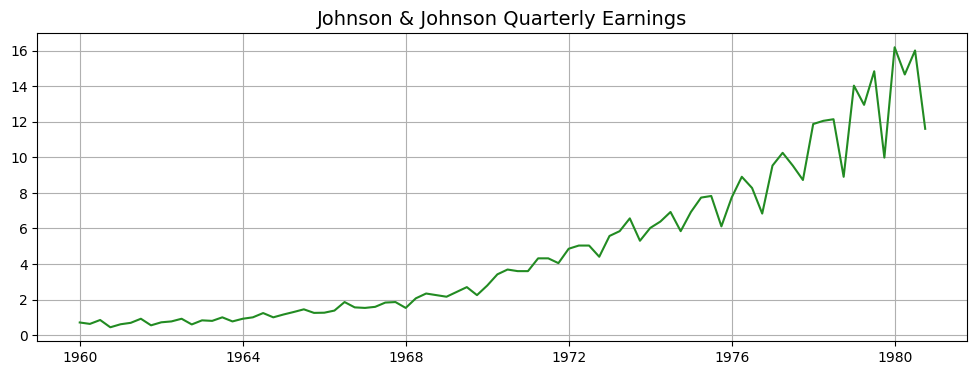

In [3]:
# Step 1: Load & Plot Data
amzn = pd.read_csv("AMZN.csv", index_col=0, parse_dates=True)
jj = pd.read_csv("jj.csv", index_col=0, parse_dates=True)

# Plot AMZN in dark magenta
plt.figure(figsize=(12, 4))
plt.plot(amzn['Adj Close'], color='#6a5acd')  # Slate Blue
plt.title("Amazon Stock - Adjusted Close", fontsize=14)
plt.grid()
plt.show()

# Plot JJ in goldenrod
plt.figure(figsize=(12, 4))
plt.plot(jj['data'], color='#228b22')  # Forest Green
plt.title("Johnson & Johnson Quarterly Earnings", fontsize=14)
plt.grid()
plt.show()

In [4]:
# Stationarity Check Function

def test_stationarity(series, title):
    rolmean = series.rolling(window=12).mean()
    rolstd = series.rolling(window=12).std()

    plt.figure(figsize=(12, 5))
    plt.plot(series, label='Original', color='#B0C4DE')     # Light Steel Blue
    plt.plot(rolmean, label='Rolling Mean', color='#008B8B') # Dark Cyan
    plt.plot(rolstd, label='Rolling Std', color='#DC143C')   # Crimson
    plt.title(f'Stationarity Test: {title}', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values: {result[4]}")


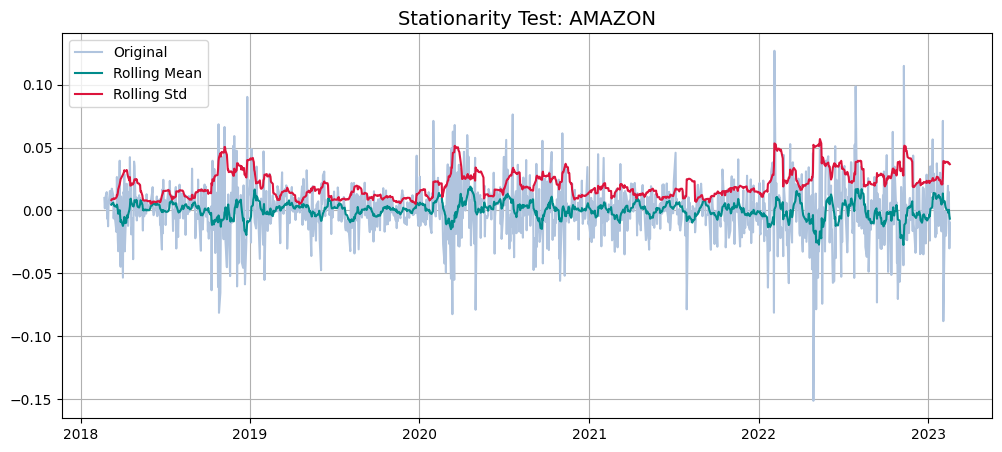

ADF Statistic: -36.6398
p-value: 0.0000
Critical Values: {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}


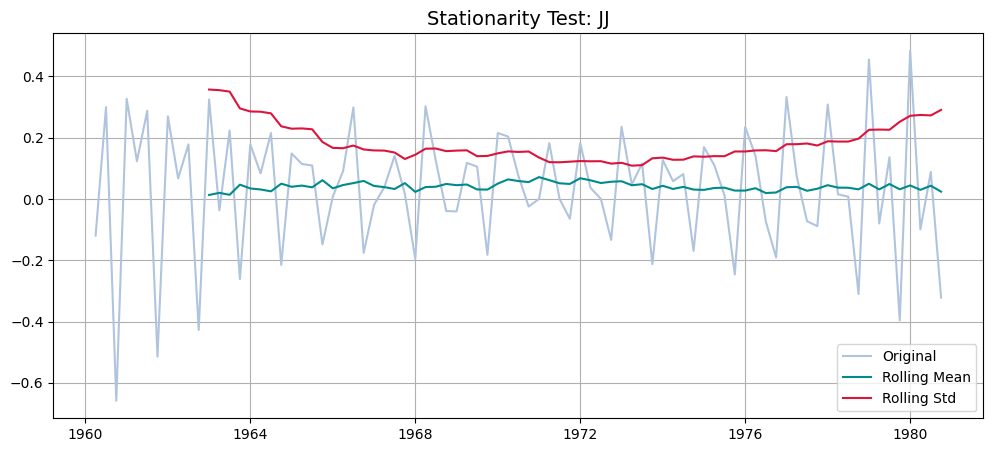

ADF Statistic: -4.3170
p-value: 0.0004
Critical Values: {'1%': -3.518281134660583, '5%': -2.899878185191432, '10%': -2.5872229937594873}


In [5]:
#Run tests
test_stationarity(np.log(amzn['Adj Close']).diff().dropna(), "AMAZON")
test_stationarity(np.log(jj['data']).diff().dropna(), "JJ")

In [6]:
# Define ARIMA and Grid Search Best
def find_best_arima(series, d=1):
    best_aic = float('inf')
    best_order = None
    best_model = None
    for p in range(5):
        for q in range(5):
            try:
                model = ARIMA(series, order=(p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, d, q)
                    best_model = model
            except:
                continue
    return best_order, best_model

amzn_log = np.log(amzn['Adj Close'])
jj_log = np.log(jj['data'])

best_order_amzn, model_amzn = find_best_arima(amzn_log)
best_order_jj, model_jj = find_best_arima(jj_log)

print("Best ARIMA AMZN:", best_order_amzn)
print("Best ARIMA JJ:", best_order_jj)



Best ARIMA AMZN: (0, 1, 0)
Best ARIMA JJ: (4, 1, 3)


C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign

Best ARIMA AMZN: (0, 1, 0)
Best ARIMA JJ: (4, 1, 3)


C:\Users\kvyja\anaconda3\envs\tf-lab\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
# Evaluate ARIMA performance
def evaluate_model(model_fit, series_log):
    pred_log = model_fit.predict(start=0, end=len(series_log)-1)
    pred = np.exp(pred_log)
    actual = np.exp(series_log)
    mae = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    return mae, rmse

amzn_mae, amzn_rmse = evaluate_model(model_amzn, amzn_log)
jj_mae, jj_rmse = evaluate_model(model_jj, jj_log)
print(f"AMZN ARIMA MAE: {amzn_mae:.2f}, RMSE: {amzn_rmse:.2f}")
print(f"JJ ARIMA MAE: {jj_mae:.2f}, RMSE: {jj_rmse:.2f}")

AMZN ARIMA MAE: 1.97, RMSE: 3.44
JJ ARIMA MAE: 0.28, RMSE: 0.40


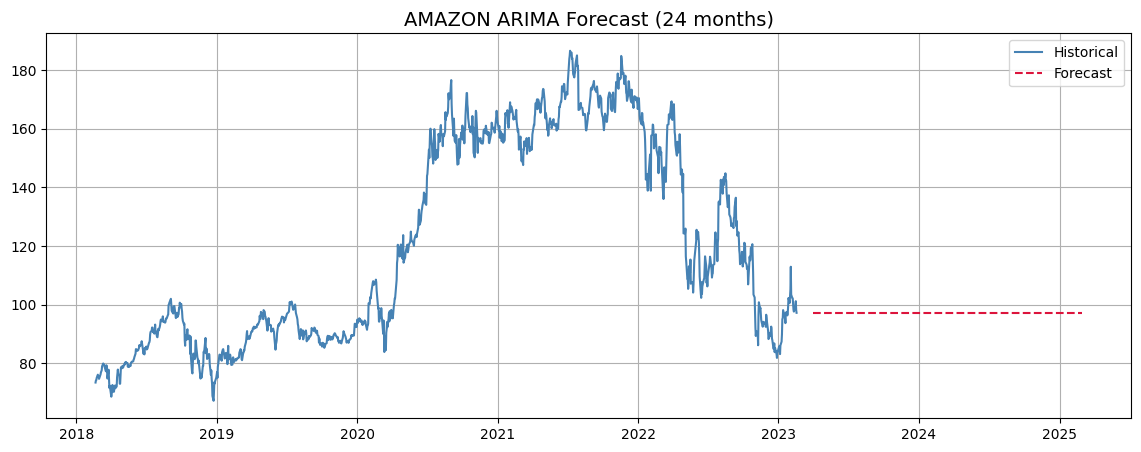

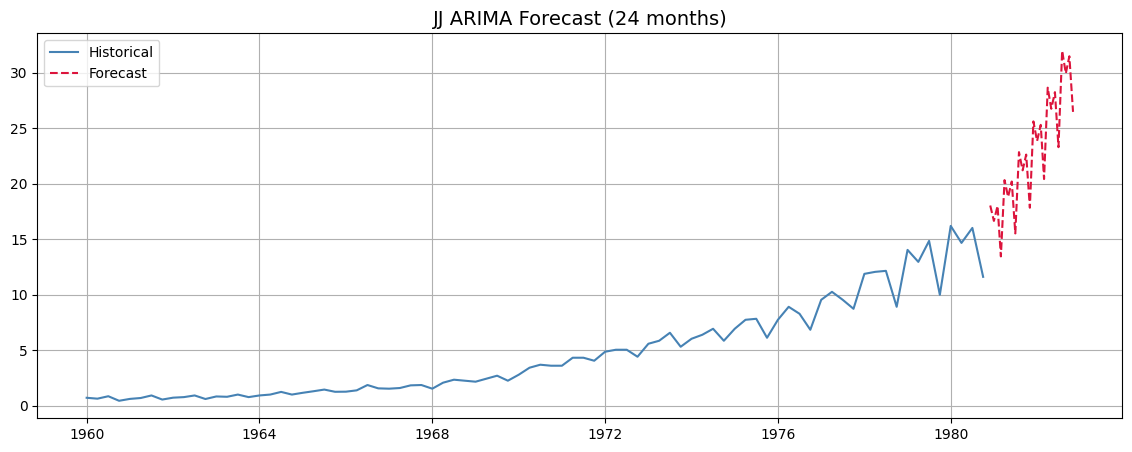

84     18.040592
85     16.652672
86     18.003163
87     13.452752
88     20.328076
89     18.816926
90     20.200206
91     15.523299
92     22.848785
93     21.210435
94     22.628805
95     17.840946
96     25.620034
97     23.851156
98     25.307429
99     20.425689
100    28.659795
101    26.757780
102    28.255299
103    23.298162
104    31.986667
105    29.949693
106    31.492357
107    26.479580
Name: predicted_mean, dtype: float64

In [8]:
# Forecast 24 months (ARIMA)

def forecast_plot(model_fit, log_series, steps=24, title="Forecast"):
    forecast_log = model_fit.forecast(steps=steps)
    forecast = np.exp(forecast_log)
    future_dates = pd.date_range(start=log_series.index[-1], periods=steps + 1, freq='M')[1:]

    plt.figure(figsize=(14, 5))
    plt.plot(np.exp(log_series), label='Historical', color='#4682B4')  # Steel Blue
    plt.plot(future_dates, forecast, label='Forecast', linestyle='--', color='#DC143C')  # Crimson Red
    plt.title(f'{title} (24 months)', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()
    return forecast

# Call plots
forecast_plot(model_amzn, amzn_log, title="AMAZON ARIMA Forecast")
forecast_plot(model_jj, jj_log, title="JJ ARIMA Forecast")



Epoch 1/30

29/29 [==============================] - 4s 33ms/step - loss: 0.1112 - val_loss: 0.0025
Epoch 2/30
29/29 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 0.0029
Epoch 3/30
29/29 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/30
29/29 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 5/30
29/29 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 6/30
29/29 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 7/30
29/29 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 8/30
29/29 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 9/30
29/29 [==============================] - 0s 14ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 10/30
29/29 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 

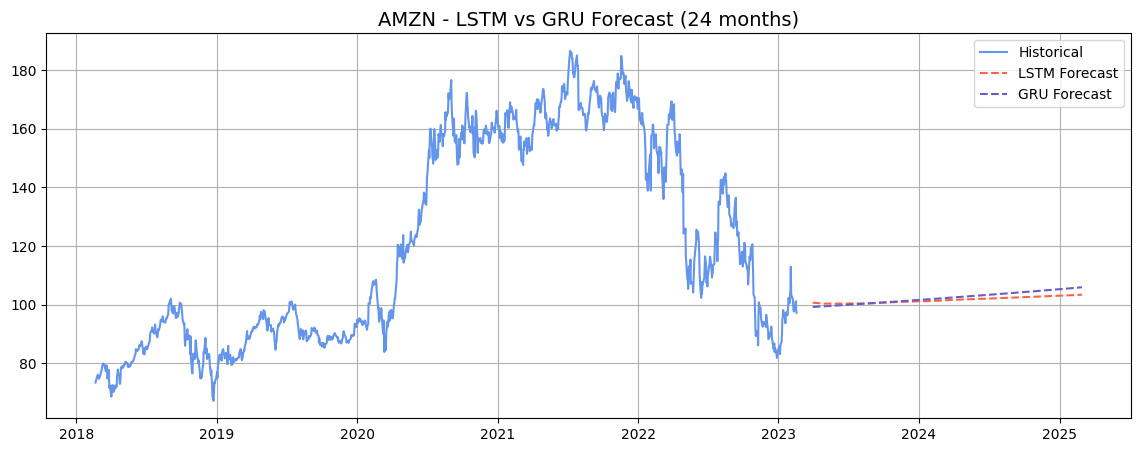

In [9]:
# RNN Models (LSTM & GRU) for AMZN

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

scaler_amzn = MinMaxScaler()
amzn_scaled = scaler_amzn.fit_transform(amzn['Adj Close'].values.reshape(-1, 1))
window_size = 12
X_amzn, y_amzn = create_sequences(amzn_scaled, window_size)
X_amzn = X_amzn.reshape((X_amzn.shape[0], X_amzn.shape[1], 1))

split = int(len(X_amzn) * 0.8)
X_train, X_test = X_amzn[:split], X_amzn[split:]
y_train, y_test = y_amzn[:split], y_amzn[split:]

# --- LSTM ---
lstm_model = Sequential([LSTM(50, activation='relu', input_shape=(window_size, 1)), Dense(1)])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=30, verbose=1, validation_split=0.1)

# --- GRU ---
gru_model = Sequential([GRU(50, activation='relu', input_shape=(window_size, 1)), Dense(1)])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=30, verbose=1, validation_split=0.1)

# --- RNN Forecast ---
def rnn_forecast(model, last_seq, steps=24, scaler=None):
    preds = []
    input_seq = last_seq.copy()
    for _ in range(steps):
        pred = model.predict(input_seq.reshape(1, window_size, 1), verbose=0)[0][0]
        preds.append(pred)
        input_seq = np.roll(input_seq, -1)
        input_seq[-1] = pred
    return scaler.inverse_transform(np.array(preds).reshape(-1, 1))

last_seq_amzn = amzn_scaled[-window_size:]
lstm_preds_amzn = rnn_forecast(lstm_model, last_seq_amzn, scaler=scaler_amzn)
gru_preds_amzn = rnn_forecast(gru_model, last_seq_amzn, scaler=scaler_amzn)

# --- RNN Forecast Plot with Alternative Colors
future_dates = pd.date_range(start=amzn.index[-1], periods=25, freq='M')[1:]
plt.figure(figsize=(14, 5))
plt.plot(amzn['Adj Close'], label="Historical", color='#6495ED')  # Cornflower Blue
plt.plot(future_dates, lstm_preds_amzn, label="LSTM Forecast", linestyle='--', color='#FF6347')  # Tomato
plt.plot(future_dates, gru_preds_amzn, label="GRU Forecast", linestyle='--', color='#6A5ACD')  # Slate Blue
plt.title("AMZN - LSTM vs GRU Forecast (24 months)", fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [10]:
#Evaluate LSTM & GRU
amzn_preds_lstm = lstm_model.predict(X_test)
amzn_preds_gru = gru_model.predict(X_test)
print("AMZN LSTM MAE:", mean_absolute_error(y_test, amzn_preds_lstm))
print("AMZN LSTM RMSE:", np.sqrt(mean_squared_error(y_test, amzn_preds_lstm)))
print("AMZN GRU MAE:", mean_absolute_error(y_test, amzn_preds_gru))
print("AMZN GRU RMSE:", np.sqrt(mean_squared_error(y_test, amzn_preds_gru)))

8/8 [==============================] - 0s 6ms/step
AMZN LSTM MAE: 0.04675440923143427
AMZN LSTM RMSE: 0.059922540255912635
AMZN GRU MAE: 0.034639960091735665
AMZN GRU RMSE: 0.04482519776477165


Epoch 1/30
2/2 [==============================] - 3s 583ms/step - loss: 0.0361 - val_loss: 0.1533
Epoch 2/30
2/2 [==============================] - 0s 71ms/step - loss: 0.0311 - val_loss: 0.1363
Epoch 3/30
2/2 [==============================] - 0s 68ms/step - loss: 0.0268 - val_loss: 0.1194
Epoch 4/30
2/2 [==============================] - 0s 74ms/step - loss: 0.0226 - val_loss: 0.1030
Epoch 5/30
2/2 [==============================] - 0s 71ms/step - loss: 0.0189 - val_loss: 0.0870
Epoch 6/30
2/2 [==============================] - 0s 84ms/step - loss: 0.0154 - val_loss: 0.0718
Epoch 7/30
2/2 [==============================] - 0s 98ms/step - loss: 0.0122 - val_loss: 0.0577
Epoch 8/30
2/2 [==============================] - 0s 78ms/step - loss: 0.0098 - val_loss: 0.0444
Epoch 9/30
2/2 [==============================] - 0s 76ms/step - loss: 0.0078 - val_loss: 0.0324
Epoch 10/30
2/2 [==============================] - 0s 89ms/step - loss: 0.0062 - val_loss: 0.0223
Epoch 11/30
2/2 [===========

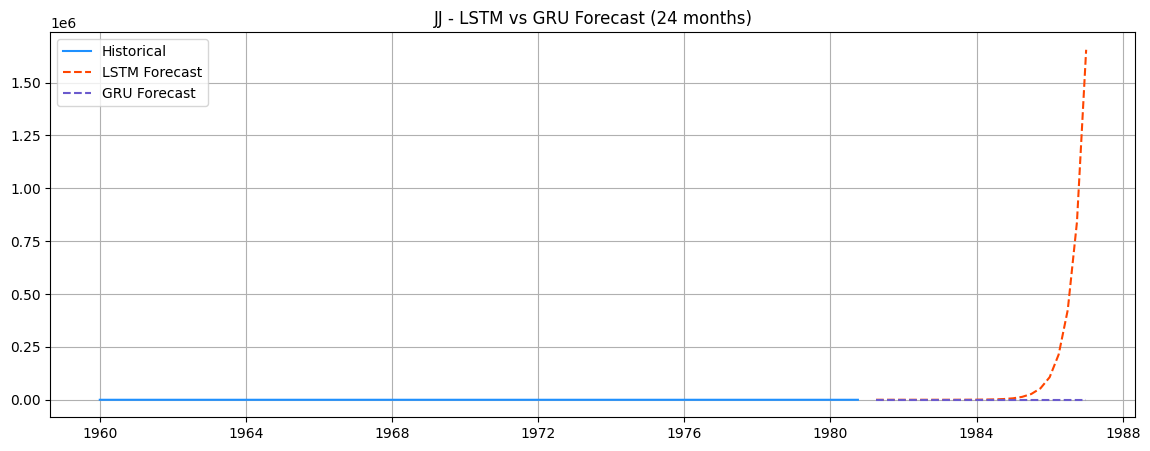

In [11]:
# RNN Modeling for JJ

scaler_jj = MinMaxScaler()
jj_scaled = scaler_jj.fit_transform(jj['data'].values.reshape(-1, 1))
X_jj, y_jj = create_sequences(jj_scaled, window_size)
X_jj = X_jj.reshape((X_jj.shape[0], X_jj.shape[1], 1))

split_jj = int(len(X_jj) * 0.8)
X_train_jj, X_test_jj = X_jj[:split_jj], X_jj[split_jj:]
y_train_jj, y_test_jj = y_jj[:split_jj], y_jj[split_jj:]

# Train LSTM for JJ
lstm_jj = Sequential([LSTM(50, activation='relu', input_shape=(window_size, 1)), Dense(1)])
lstm_jj.compile(optimizer='adam', loss='mse')
lstm_jj.fit(X_train_jj, y_train_jj, epochs=30, verbose=1, validation_split=0.1)

# Train GRU for JJ
gru_jj = Sequential([GRU(50, activation='relu', input_shape=(window_size, 1)), Dense(1)])
gru_jj.compile(optimizer='adam', loss='mse')
gru_jj.fit(X_train_jj, y_train_jj, epochs=30, verbose=1, validation_split=0.1)

# Forecast
# Forecast
last_seq_jj = jj_scaled[-window_size:]
lstm_preds_jj = rnn_forecast(lstm_jj, last_seq_jj, scaler=scaler_jj)
gru_preds_jj = rnn_forecast(gru_jj, last_seq_jj, scaler=scaler_jj)

future_dates_jj = pd.date_range(start=jj.index[-1], periods=25, freq='Q')[1:]

# Plot with custom colors
plt.figure(figsize=(14, 5))
plt.plot(jj['data'], label="Historical", color='#1E90FF')               # Dodger Blue
plt.plot(future_dates_jj, lstm_preds_jj, label="LSTM Forecast", linestyle='--', color='#FF4500')  # Orange Red
plt.plot(future_dates_jj, gru_preds_jj, label="GRU Forecast", linestyle='--', color='#6A5ACD')   # Slate Blue
plt.title("JJ - LSTM vs GRU Forecast (24 months)")
plt.legend()
plt.grid()
plt.show()


In [12]:
# Evaluation
jj_preds_lstm = lstm_jj.predict(X_test_jj)
jj_preds_gru = gru_jj.predict(X_test_jj)
print("JJ LSTM MAE:", mean_absolute_error(y_test_jj, jj_preds_lstm))
print("JJ LSTM RMSE:", np.sqrt(mean_squared_error(y_test_jj, jj_preds_lstm)))
print("JJ GRU MAE:", mean_absolute_error(y_test_jj, jj_preds_gru))
print("JJ GRU RMSE:", np.sqrt(mean_squared_error(y_test_jj, jj_preds_gru)))

1/1 [==============================] - 0s 55ms/step
JJ LSTM MAE: 0.1584683354476826
JJ LSTM RMSE: 0.23109561718524657
JJ GRU MAE: 0.11870820350282281
JJ GRU RMSE: 0.13813307984057996
